In [1]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
pd.options.display.float_format = "{:,.2f}".format

In [3]:
#loading data
data = pd.read_csv('/Users/jayco/Desktop/EBGN590/Final-Project/Data/project_data.csv')
data = data.drop(data.columns[0],axis=1)
data = data.rename(columns={'renewable_residential_consumption' : 'ren_res_cons'})
data.head()

,DATE,energy_index,ppi_coal,ppi_crude,ppi_nat_gas,ppi_gasoline,ppi_diesel,ppi_heat_oil,effr_change,cpi_change,dxy,ren_res_cons
0,1994-01-01,73.20,32.13,18.25,101.76,21.73,13.28,18.46,3.04,0.30,91.77,48.03
1,1994-02-01,74.17,31.69,17.57,91.27,23.05,14.63,20.70,6.56,0.30,90.77,43.97
2,1994-03-01,74.26,31.72,18.42,98.03,22.86,14.70,19.70,2.77,0.30,89.34,49.65
3,1994-04-01,73.86,31.86,19.83,95.00,24.33,14.11,19.40,6.59,0.10,88.44,48.72
4,1994-05-01,73.22,31.93,22.73,86.96,24.82,14.16,19.45,12.64,0.10,88.82,50.73


In [4]:
#prelim stats
data.describe()

,energy_index,ppi_coal,ppi_crude,ppi_nat_gas,ppi_gasoline,ppi_diesel,ppi_heat_oil,effr_change,cpi_change,dxy,ren_res_cons
count,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00,362.00
mean,131.44,54.27,69.15,165.11,70.96,50.73,58.83,1.88,0.21,88.59,47.15
std,40.80,21.07,38.51,89.24,35.95,31.20,31.42,18.07,0.35,10.20,7.72
min,70.58,28.54,12.11,51.29,17.13,9.84,13.78,-92.31,-1.90,68.93,32.31
25%,89.82,31.94,33.91,98.12,36.74,22.17,29.68,-1.12,0.00,80.10,40.25
50%,139.43,62.40,64.90,133.87,68.32,49.20,57.61,0.00,0.20,88.88,47.27
75%,161.58,69.06,96.32,203.87,97.43,72.58,80.87,4.21,0.40,95.09,52.57
max,234.38,110.63,178.50,526.40,173.39,172.02,149.73,150.00,1.40,115.44,66.23


In [5]:
#constructing variable matrices
index = data['energy_index']
regressors = data[['ppi_coal','ppi_crude','ppi_nat_gas','ppi_gasoline','ppi_diesel','ppi_heat_oil']]
econ_ctrl = data[['effr_change','cpi_change','dxy']]
energy_ctrl = data[['ren_res_cons']]

index.shape, regressors.shape, econ_ctrl.shape, energy_ctrl.shape

((362,), (362, 6), (362, 3), (362, 1))

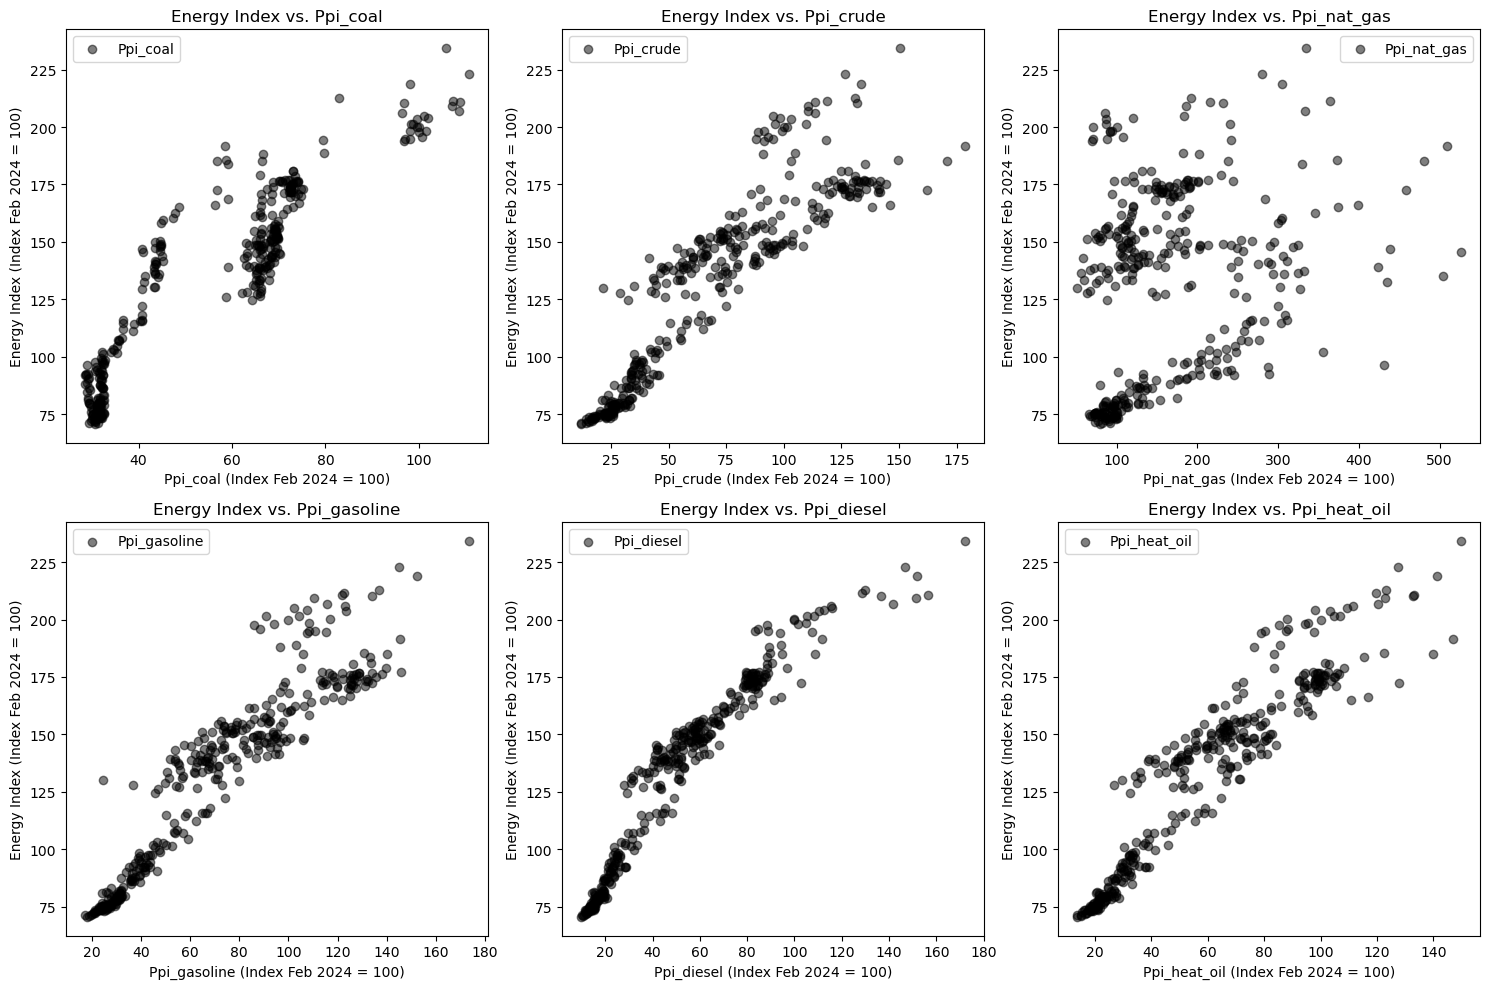

In [6]:
#Creating a subplot grid of each industry ppi vs the energy index
commodities = ['ppi_coal','ppi_crude','ppi_nat_gas','ppi_gasoline','ppi_diesel','ppi_heat_oil']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

axs_flat = axs.flatten()

for i, commodity in enumerate(commodities):
    axs_flat[i].scatter(data[commodity], data['energy_index'], label=commodity.capitalize(), color='black', alpha=0.5)
    axs_flat[i].set_xlabel(f'{commodity.capitalize()} (Index Feb 2024 = 100)')
    axs_flat[i].set_ylabel('Energy Index (Index Feb 2024 = 100)')
    axs_flat[i].legend()
    axs_flat[i].set_title(f'Energy Index vs. {commodity.capitalize()}')

plt.tight_layout()
plt.show()
fig.savefig('/Users/jayco/Desktop/EBGN590/Final-Project/Images/index_vs_price.png')

In [2]:
import seaborn as sns

#Creating correlation matrix to observe variable correlation
corr_matrix=data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.savefig('/Users/jayco/Desktop/EBGN590/Final-Project/Images/corr_matrix.png')

plt.show()

NameError: name 'df' is not defined

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=data[['energy_index','ppi_coal','ppi_crude','ppi_nat_gas','ppi_gasoline','ppi_diesel','ppi_heat_oil','effr_change','cpi_change','dxy','ren_res_cons']]
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature    VIF
0   energy_index 501.96
1       ppi_coal 169.87
2      ppi_crude 168.94
3    ppi_nat_gas  13.72
4   ppi_gasoline 213.85
5     ppi_diesel  91.23
6   ppi_heat_oil 283.96
7    effr_change   1.28
8     cpi_change   1.72
9            dxy  57.86
10  ren_res_cons  66.71


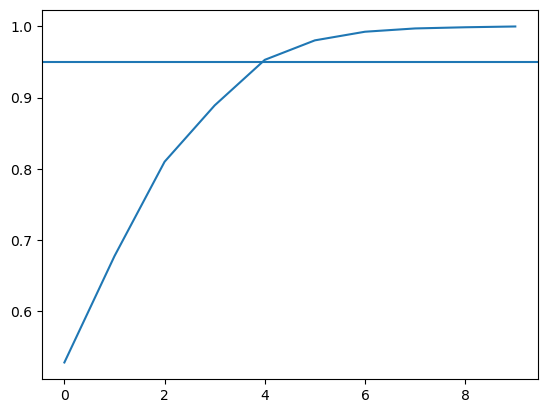

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_corrected = data[['ppi_coal', 'ppi_crude', 'ppi_nat_gas', 'ppi_gasoline', 'ppi_diesel', 'ppi_heat_oil', 
                    'effr_change', 'cpi_change', 'dxy', 'ren_res_cons']]

#Standardizing the data
scaler_corrected = StandardScaler()
X_scaled_corrected = scaler_corrected.fit_transform(X_corrected)

#PCA 
pca_corrected = PCA()
X_pca_corrected = pca_corrected.fit_transform(X_scaled_corrected)

#Plotting CEV to determine optimal amount of PCs
explained_variance = pca_corrected.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(cumulative_explained_variance)
plt.axhline(y=.95)


In [10]:

models = {'Regressor':[], 'Summary':[], 'PC_relationships':[]}

for col in regressors:
    # Combine current regressor with control variables
    X = pd.concat([regressors[[col]], econ_ctrl, energy_ctrl], axis=1)
    
    # Standardize features
    X_standardized = StandardScaler().fit_transform(X)
    
    # Perform PCA with 5 components
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X_standardized)
    
    # Fit linear regression model using only the PCA components
    X_pca = sm.add_constant(X_pca)  # adding a constant for the intercept
    model = sm.OLS(index, X_pca).fit()

    loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X.columns)
    
    models['Regressor'].append(col)
    models['Summary'].append(model.summary().as_text())
    models['PC_relationships'].append(loadings.to_string())
    

In [11]:
X_total = pd.concat([regressors, econ_ctrl, energy_ctrl], axis=1)
    
# Standardize features
X_standardized = StandardScaler().fit_transform(X_total)

# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca_total = pca.fit_transform(X_standardized)

# Fit linear regression model using only the PCA components
X_pca_total = sm.add_constant(X_pca_total)  # adding a constant for the intercept
model = sm.OLS(index, X_pca_total).fit()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X_total.columns)

models['Regressor'].append('total')
models['Summary'].append(model.summary().as_text())
models['PC_relationships'].append(loadings.to_string())

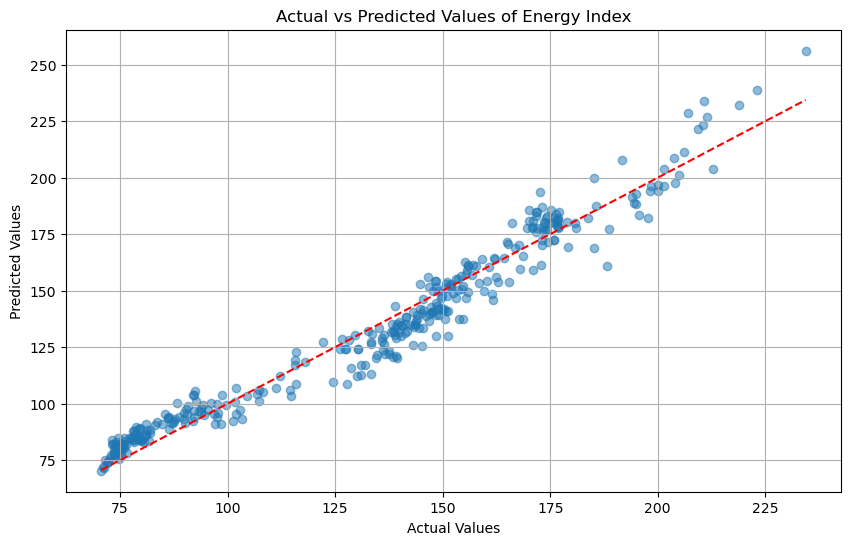

<Figure size 640x480 with 0 Axes>

In [15]:
predictions = model.predict(X_pca_total)
actual = index

plt.figure(figsize=(10, 6))
plt.scatter(actual, predictions, alpha=0.5)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of Energy Index')
plt.grid(True)
plt.show()

plt.savefig('/Users/jayco/Desktop/EBGN590/Final-Project/Images/regression_visualization.png')

In [13]:
import json

json_str = json.dumps(models)
with open('/Users/jayco/Desktop/EBGN590/Final-Project/Data/models.json', 'w') as f:
    f.write(json_str)